In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('C:/Users/ACER/Downloads/data and pivot/Data and Pivot Table.csv')

In [ ]:
data.head()

,Station,Year,Month,Day,Hour,Season,Visibility (m),Visibility type
0,411840,2010,1,1,0,Winter,9978.0,Blowing Dust
1,411840,2010,1,1,1,Winter,9978.0,Blowing Dust
2,411840,2010,1,1,2,Winter,9978.0,Blowing Dust
3,411840,2010,1,1,3,Winter,9978.0,Blowing Dust
4,411840,2010,1,1,4,Winter,9978.0,Blowing Dust


In [ ]:
data.shape

(550092, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550092 entries, 0 to 550091
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Station          550092 non-null  int64  
 1   Year             550092 non-null  int64  
 2   Month            550092 non-null  int64  
 3   Day              550092 non-null  int64  
 4   Hour             550092 non-null  int64  
 5   Season           550092 non-null  object 
 6   Visibility (m)   412927 non-null  float64
 7   Visibility type  550092 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 33.6+ MB


In [ ]:
data.isnull().sum()

Station                 0
Year                    0
Month                   0
Day                     0
Hour                    0
Season                  0
Visibility (m)     137165
Visibility type         0
dtype: int64

In [ ]:
data=data.dropna(axis=0)

In [ ]:
data.isnull().sum()

Station            0
Year               0
Month              0
Day                0
Hour               0
Season             0
Visibility (m)     0
Visibility type    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412927 entries, 0 to 550091
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Station          412927 non-null  int64  
 1   Year             412927 non-null  int64  
 2   Month            412927 non-null  int64  
 3   Day              412927 non-null  int64  
 4   Hour             412927 non-null  int64  
 5   Season           412927 non-null  object 
 6   Visibility (m)   412927 non-null  float64
 7   Visibility type  412927 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 28.4+ MB


In [ ]:
data

,Station,Year,Month,Day,Hour,Season,Visibility (m),Visibility type
0,411840,2010,1,1,0,Winter,9978.0,Blowing Dust
1,411840,2010,1,1,1,Winter,9978.0,Blowing Dust
2,411840,2010,1,1,2,Winter,9978.0,Blowing Dust
3,411840,2010,1,1,3,Winter,9978.0,Blowing Dust
4,411840,2010,1,1,4,Winter,9978.0,Blowing Dust
...,...,...,...,...,...,...,...,...
550076,412180,2017,12,25,6,Winter,9978.0,Blowing Dust
550088,412180,2017,12,25,18,Winter,9978.0,Blowing Dust
550089,412180,2017,12,25,19,Winter,7081.0,Blowing Dust
550090,412180,2017,12,25,20,Winter,6115.0,Blowing Dust


In [ ]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [ ]:
data.head()

,Station,Year,Month,Day,Hour,Season,Visibility (m),Visibility type
0,411840,2010,1,1,0,3,9978.0,0
1,411840,2010,1,1,1,3,9978.0,0
2,411840,2010,1,1,2,3,9978.0,0
3,411840,2010,1,1,3,3,9978.0,0
4,411840,2010,1,1,4,3,9978.0,0


<AxesSubplot:xlabel='Hour', ylabel='count'>

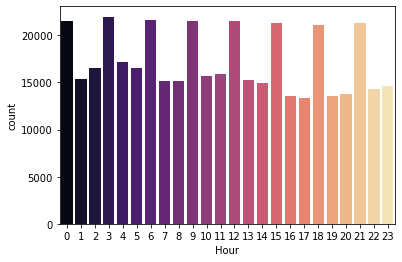

In [ ]:
sns.countplot(x='Hour',data=data,palette='magma')

<AxesSubplot:xlabel='Year', ylabel='count'>

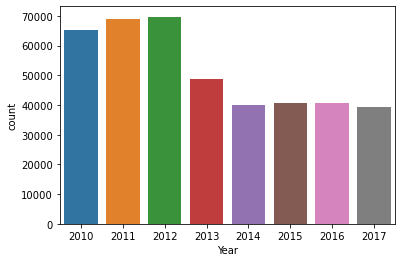

In [ ]:
sns.countplot(x='Year',data=data)

In [ ]:
data.drop(['Visibility type'], axis = 1,inplace=True)

In [ ]:
data.head()

,Station,Year,Month,Day,Hour,Season,Visibility (m)
0,411840,2010,1,1,0,3,9978.0
1,411840,2010,1,1,1,3,9978.0
2,411840,2010,1,1,2,3,9978.0
3,411840,2010,1,1,3,3,9978.0
4,411840,2010,1,1,4,3,9978.0


In [ ]:
X = data[['Year','Month','Day','Hour','Season' ]].values
y = data['Visibility (m)'].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train,y_train)
print(MultiNB)
y_pred = MultiNB.predict(X_test)

MultinomialNB()


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
#print(classification_report(y_test,y_pred))
print('Accuracy Score',accuracy_score(y_test,y_pred))



Accuracy Score 0.45509199556822927


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=10, max_features="auto")
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test,y_pred1)
print("Accuracy for RandomForest:\t"+str(accuracy1))

Accuracy for RandomForest:	0.5204848308722475
